In [1]:
import numpy as np
import pandas as pd
# import nclcmaps
from cartopy.feature import ShapelyFeature
import matplotlib.cm as cm
from matplotlib import *
import scipy as sc
from scipy.stats import t,norm
from cartopy.io.shapereader import Reader
from scipy import stats,signal
from matplotlib import pyplot as plt
import cartopy as cart
import xarray as xr
from netCDF4 import Dataset
import matplotlib
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from scipy import stats
from scipy import signal

### Reading variables

In [2]:
#####eof##############################

%store -r eof1
%store -r cor_map1
%store -r cor_map2
%store -r lat
%store -r lon
%store -r cor_map1_u
%store -r cor_map1_v
%store -r cor_map2_u
%store -r cor_map2_v
%store -r lat_v
%store -r lon_v
%store -r cor_map1_h
%store -r cor_map2_h
%store -r lon_h
%store -r lat_h
%store -r cor_map1_o
%store -r cor_map2_o
%store -r lat_o
%store -r lon_o


####################PC&depressions############################


%store -r vor_anom_850
%store -r pcs_df
%store -r hgt_df
%store -r dpfreq_df
######pc1##########
%store -r nino_df

no stored variable or alias cor_map1_h
no stored variable or alias cor_map2_h
no stored variable or alias lon_h
no stored variable or alias lat_h


In [3]:
# eof1=eof1*-1
eof1[0].shape

(1, 129, 135)

## Figure 1- Plotting

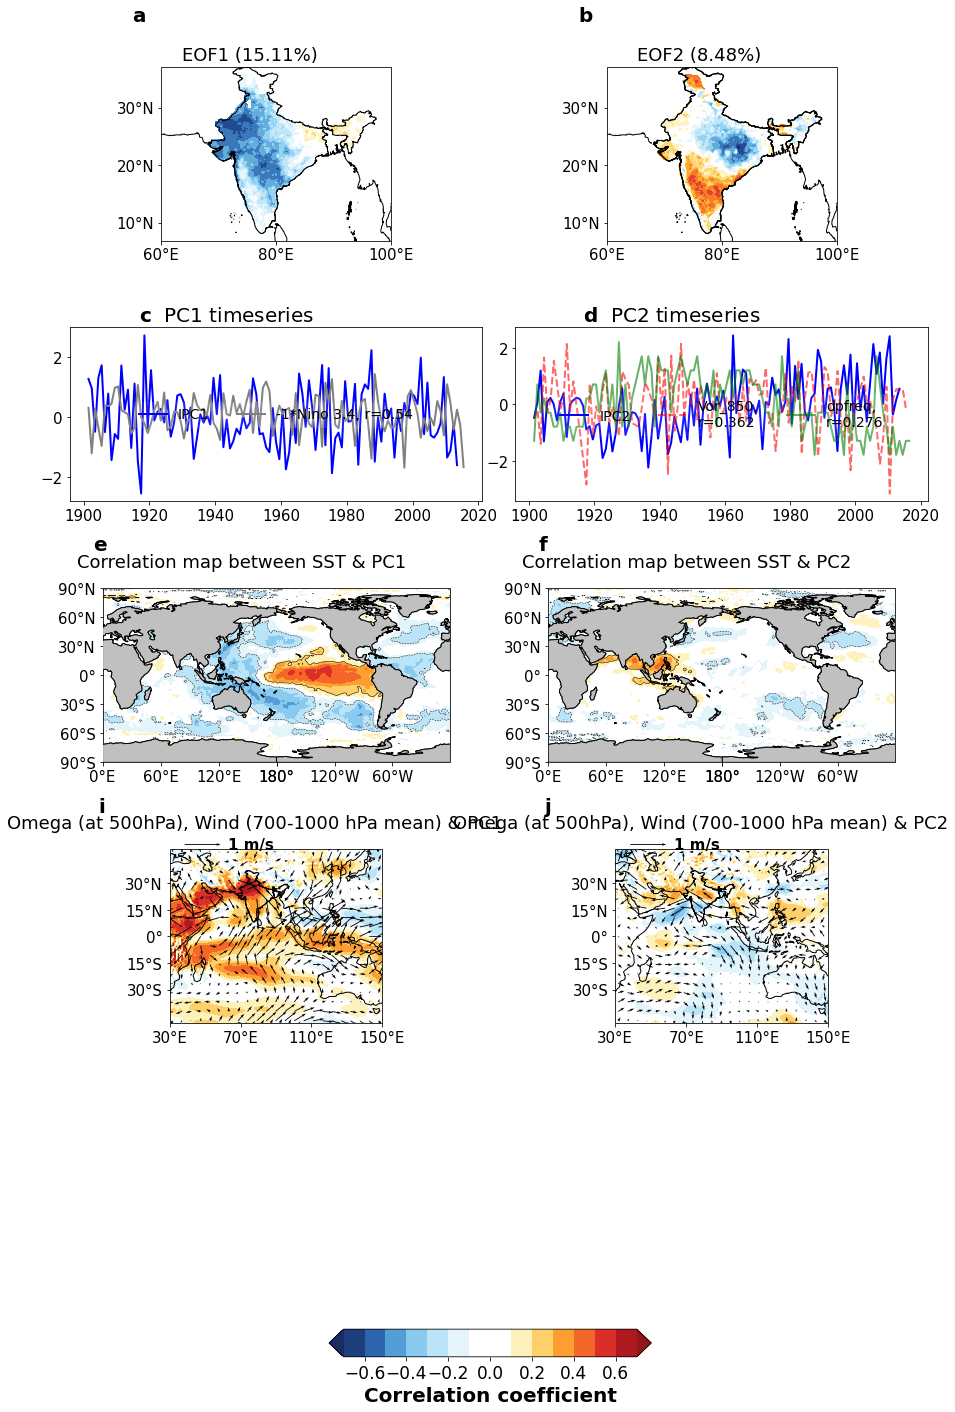

In [4]:
import nclcmaps2

fig = plt.figure(figsize=(16,32))
fig.subplots_adjust(hspace=0.5, wspace=0.08)
cmap1= nclcmaps2.cmap('BlueWhiteOrangeRed')
plt.rcParams['font.size'] = 15
v         =    np.arange(-0.7,0.8,0.1)

# a ############################################

ax1 = fig.add_subplot(7,2,1,projection=ccrs.PlateCarree())
fill = eof1[0][0].plot.contourf(ax=ax1, levels=v, cmap=cmap1,
                             add_colorbar=False, transform=ccrs.PlateCarree(),extend='both')
ax1.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
ax1.set_title('EOF1 (explains 16% of the total variance)', fontsize=16)
fname='/home/cccr/roxy/panini/yang/era5_yang/Shape_file/India_Country_dcml_dgr.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none',edgecolor='k')
ax1.add_feature(shape_feature)
ax1.set_xticks([60, 80, 100],crs=ccrs.PlateCarree())
ax1.set_yticks([10, 20, 30],crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_title('EOF1 (15.11%) ',   x=0.4, y=1.0,  fontsize=18)
ax1.text(55,45,'a', fontsize=20, weight="bold")

# c ###############################################
ax2 = fig.add_subplot(7,2,3)

# pc[:, 0].plot(ax=ax2,color='b', linewidth=2)
plt.plot(pcs_df['IPC1'][:-3], label='IPC1', color='blue',linewidth=2)
plt.plot(-1*nino_df[:-3], label='-1*Nino 3.4, r=0.54', color='grey',alpha=1,linewidth=2)
ax2.set_title('PC1', fontsize=12)
ax2.set_xlabel('')
plt.legend(loc='center', 
          ncol=7, fontsize=14, framealpha=0.1)
ax2.set_title(r'$\bf{{{c}}}$  PC1 timeseries', x=0.38, y=1.0,fontsize=20)
# ax2.text(25,0.004,'c', fontsize=22, weight="bold")
# ax2.text(-30,0.05,'c', fontsize=22)



# b ######################################
ax3 = fig.add_subplot(7,2,2,projection=ccrs.PlateCarree())
fill = eof1[1][0].plot.contourf(ax=ax3, levels=v, cmap=cmap1,
                             add_colorbar=False, transform=ccrs.PlateCarree(),extend='both')
ax3.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
ax3.add_feature(shape_feature)
ax3.add_feature(shape_feature)
ax3.set_xticks([60, 80, 100],crs=ccrs.PlateCarree())
ax3.set_yticks([10, 20, 30],crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_title('EOF2 (8.48%)',  x=0.4, y=1.0, fontsize=18)
# ax3.text(25,0.004,'b', fontsize=22, weight="bold")
ax3.text(55,45,'b', fontsize=20, weight="bold")



# d ###############################################
ax4 = fig.add_subplot(7,2,4)
# pcs_df['IPC2'][:-3].plot(ax=ax4, label='IPC2')
ax4.plot(pcs_df.index[:-3],pcs_df['IPC2'][:-3], label='IPC2', color='blue', linewidth=2)
plt.plot(vor_anom_850['time'],vor_anom_850['VOR'], label='Vor_850,\nr=0.362', color='red',linestyle='--',alpha=0.6,linewidth=2)
# ax4.plot(dpfreq_df['dpfreq'])
# plt.plot(hgt_df['hgt_850'])
# dpfreq_df['dpfreq'].plot(ax=ax4, label='IPC2')

ax4.plot(dpfreq_df['dpfreq'], label='dpfreq,\nr=0.276', color='green',alpha=0.6,linewidth=2)
plt.legend(loc='center',ncol=7, fontsize=14,  framealpha=0.1)
# plt.rc('text', usetex=True)
# ax4.set_title(r'$\bf{{{d}}}${\fontsize{18pt}{3em}\selectfont{}(PC2 timeseries)}', x=0.38, y=1.0,fontsize=20)
# plt.title(r'{\fontsize{30pt}{3em}\selectfont{}{$\bf{{{d}}}$\r}{\fontsize{18pt}{3em}\selectfont{}(PC2 timeseries)}', x=0.38, y=1.0)
# ax4.set_title('PC2 timeseries', weight='bold',  x=0.4, y=1.0,  fontsize=16)
# ax4.text(-190,130,'e', fontsize=22, weight="bold")
ax4.set_title(r'$\bf{{{d}}}$  PC2 timeseries', x=0.38, y=1.0,fontsize=20)


# e #######################################
import nclcmaps2
cmap1= nclcmaps2.cmap('BlueWhiteOrangeRed')
proj=ccrs.PlateCarree(central_longitude=180.0)
ax5 = fig.add_subplot(7,2,5,projection=proj)
plt.rcParams['font.size'] = 15

# v         =    np.arange(-0.7,0.8,0.1)
plotted1=ax5.contourf(lon,lat,cor_map1[0,:,:],v, cmap= cmap1,extend='both',transform = ccrs.PlateCarree())
ax5.contour(lon,lat,cor_map1[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
ax5.set_xticks([0, 60, 120, 180, -60, -120, -180], crs=ccrs.PlateCarree())
ax5.set_yticks([-90, -60, -30, 0, 30,  60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax5.xaxis.set_major_formatter(lon_formatter)
ax5.yaxis.set_major_formatter(lat_formatter)
ax5.coastlines()
ax5.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', facecolor='silver')
ax5.tick_params(labelsize=15)
ax5.set_title('Correlation map between SST & PC1',   x=0.4, y=1.09,  fontsize=18)
ax5.text(-190,130,'e', fontsize=20, weight="bold")

# f ##############################################################3
ax6 = fig.add_subplot(7,2,6,projection=proj)
plt.rcParams['font.size'] = 15

plotted2=ax6.contourf(lon,lat,cor_map2[0,:,:],v, cmap= cmap1,extend='both',transform = ccrs.PlateCarree())
ax6.contour(lon,lat,cor_map2[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
ax6.set_xticks([0, 60, 120, 180, -60, -120, -180], crs=ccrs.PlateCarree())
ax6.set_yticks([-90, -60, -30, 0, 30,  60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax6.xaxis.set_major_formatter(lon_formatter)
ax6.yaxis.set_major_formatter(lat_formatter)
ax6.coastlines()
ax6.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', facecolor='silver')
ax6.tick_params(labelsize=15)
ax6.text(-190,130,'f', fontsize=20, weight="bold")
ax6.set_title('Correlation map between SST & PC2',   x=0.4, y=1.09,  fontsize=18)

# g ##########################################################################################3
# fname='/home/cccr/roxy/panini/yang/era5_yang/Shape_file/India_Country_dcml_dgr.shp'
# shape_feature = ShapelyFeature(Reader(fname).geometries(),ccrs.PlateCarree(), facecolor='none',edgecolor='k')
# ax7 = fig.add_subplot(7,2,7,projection=proj)
# plt.rcParams['font.size'] = 15
# # np.arange(-0.78,0.8,0.02)
# plotted_h=ax7.contourf(lon_h, lat_h, 1*cor_map1_h.squeeze(), cmap=cmap1,  levels=v, extend='both',transform = ccrs.PlateCarree())
# qui1 = ax7.quiver(lon_v[::4],lat_v[::4],1*cor_map1_u[0,::4,::4],1*cor_map1_v[0,::4,::4], width=0.004,regrid_shape=35,
#                    scale=2, scale_units="inches",color='black', transform = ccrs.PlateCarree())
# ax7.quiverkey(qui1, 0.24, 1.028, 1, '1 m/s',labelpos='E',fontproperties={'weight': 'bold'})
# ax7.add_feature(shape_feature)
# extent = [30, 150, -30, 30]
# ax7.set_extent(extent)
# ax7.set_xticks([30,   70,   110,   150], crs=ccrs.PlateCarree())
# ax7.set_yticks([-30,   -15, 0,  15,    30], crs=ccrs.PlateCarree())
# ax7.coastlines()
# # ax7.gridlines()
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax7.xaxis.set_major_formatter(lon_formatter)
# ax7.yaxis.set_major_formatter(lat_formatter)
# ax7.tick_params(labelsize=15)
# ax7.set_title('hgt(at 850hPa), Wind (at 700hPa) & PC1',   x=0.4, y=1.09,  fontsize=18)
# ax7.text(-190,70,'g', fontsize=20, weight="bold")

# # h ########################################################################
# ax8 = fig.add_subplot(7,2,8,projection=proj)
# plt.rcParams['font.size'] = 15

# plotted_h=ax8.contourf(lon_h, lat_h, 1*cor_map2_h.squeeze(), cmap=cmap1,  levels=v, extend='both',transform = ccrs.PlateCarree())
# qui2 = ax8.quiver(lon_v[::4],lat_v[::4],1*cor_map2_u[0,::4,::4],1*cor_map2_v[0,::4,::4], width=0.004,regrid_shape=35,
#                    scale=2, scale_units="inches",color='black', transform = ccrs.PlateCarree())
# ax8.quiverkey(qui2, 0.24, 1.028, 1, '1 m/s',labelpos='E',fontproperties={'weight': 'bold'})
# ax8.add_feature(shape_feature)
# extent = [30, 150, -30, 30]
# ax8.set_extent(extent)
# ax8.set_xticks([30,  70,   110, 150], crs=ccrs.PlateCarree())
# ax8.set_yticks([-30,  -15, 0,  15,  30], crs=ccrs.PlateCarree())
# ax8.coastlines()
# # ax8.gridlines()
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax8.xaxis.set_major_formatter(lon_formatter)
# ax8.yaxis.set_major_formatter(lat_formatter)
# ax8.tick_params(labelsize=15)
# ax8.set_title('hgt(at 850hPa), Wind (at 700hPa) & PC2',   x=0.4, y=1.09,  fontsize=18)
# ax8.text(-190,70,'h', fontsize=20, weight="bold")

# i ######################################################

ax9 = fig.add_subplot(7,2,7,projection=proj)
# np.arange(-0.60,0.62,0.02)
plotted_o=ax9.contourf(lon_o, lat_o, 1*cor_map1_o.squeeze(), cmap=cmap1,  levels=v, extend='both',transform = ccrs.PlateCarree())
qui1 = ax9.quiver(lon_v[::4],lat_v[::4],1*cor_map1_u[0,::4,::4],1*cor_map1_v[0,::4,::4], width=0.004,regrid_shape=35,
                   scale=2, scale_units="inches",color='black', transform = ccrs.PlateCarree())
ax9.quiverkey(qui1, 0.24, 1.028, 1, '1 m/s',labelpos='E',fontproperties={'weight': 'bold'})
ax9.add_feature(shape_feature)
extent = [30, 150, -30, 30]
ax9.set_extent(extent)
ax9.set_xticks([30,  70, 110, 150], crs=ccrs.PlateCarree())
ax9.set_yticks([-30, -15, 0,  15,   30], crs=ccrs.PlateCarree())

ax9.coastlines()
# ax9.gridlines()
ax9.set_aspect('equal')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax9.xaxis.set_major_formatter(lon_formatter)
ax9.yaxis.set_major_formatter(lat_formatter)
ax9.tick_params(labelsize=15)
ax9.set_title('Omega (at 500hPa), Wind (700-1000 hPa mean) & PC1',  x=0.4, y=1.09, fontsize=18)
ax9.text(-190,70,'i', fontsize=20, weight="bold")

# j ###########################################################



ax10 = fig.add_subplot(7,2,8,projection=proj)
plotted=ax10.contourf(lon_o, lat_o, 1*cor_map2_o.squeeze(), cmap=cmap1,  levels=v, extend='both',transform = ccrs.PlateCarree())

qui2 = ax10.quiver(lon_v[::4],lat_v[::4],1*cor_map2_u[0,::4,::4],1*cor_map2_v[0,::4,::4], width=0.004,regrid_shape=35,
                   scale=2, scale_units="inches",color='black', transform = ccrs.PlateCarree())
ax10.quiverkey(qui2, 0.24, 1.028, 1, '1 m/s',labelpos='E',fontproperties={'weight': 'bold'})
ax10.add_feature(shape_feature)
extent = [30, 150, -30, 30]
ax10.set_extent(extent)
ax10.set_xticks([30, 70,   110, 150], crs=ccrs.PlateCarree())
ax10.set_yticks([-30,  -15, 0,  15,  30], crs=ccrs.PlateCarree())
ax10.yaxis.set_major_formatter(lat_formatter)

ax10.coastlines()
# ax10.gridlines()
ax10.set_aspect('equal')

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax10.xaxis.set_major_formatter(lon_formatter)

ax10.set_title('Omega (at 500hPa), Wind (700-1000 hPa mean) & PC2',  x=0.4, y=1.09, fontsize=18)
ax10.text(-190, 70,'j', fontsize=20, weight="bold")

fig.subplots_adjust(right=0.87)
cax = fig.add_axes([0.35, 0.32, 0.28, 0.012])
cb=fig.colorbar(plotted, cax=cax, label='SST Difference', orientation='horizontal', fraction=.1, pad = 0.9)
cb.set_label(label='Correlation coefficient',weight='bold', fontsize=20)
cb.ax.tick_params(labelsize=17)

plt.savefig("figure1.png", transparent = True, bbox_inches='tight', dpi=300)
            



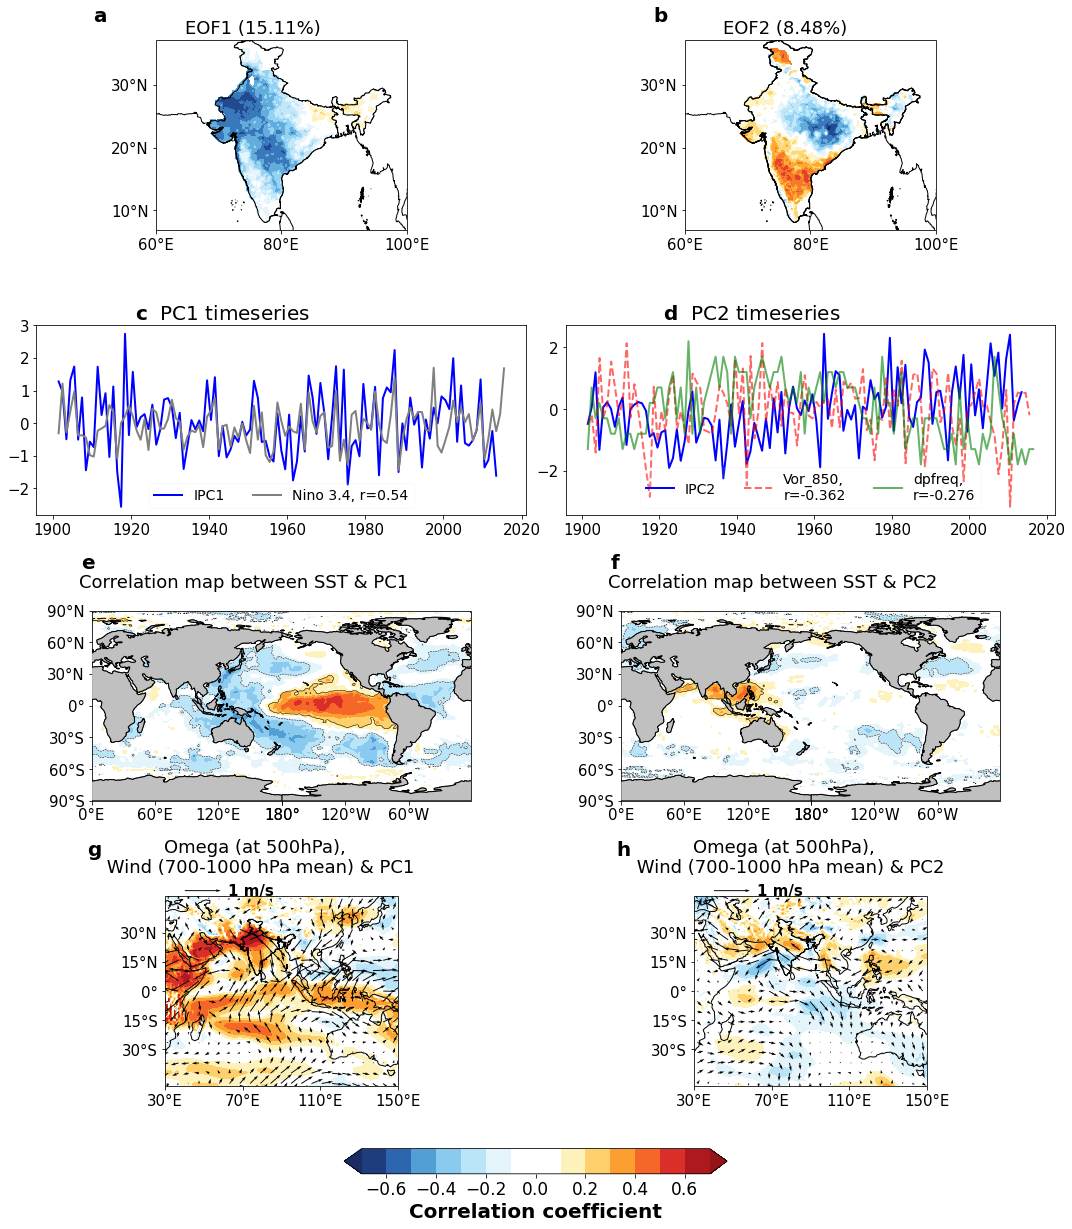

In [6]:
import nclcmaps2

fig = plt.figure(figsize=(19,35))
fig.subplots_adjust(hspace=0.5, wspace=0.08)
cmap1= nclcmaps2.cmap('BlueWhiteOrangeRed')
plt.rcParams['font.size'] = 15
v         =    np.arange(-0.7,0.8,0.1)

# a ############################################

ax1 = fig.add_subplot(7,2,1,projection=ccrs.PlateCarree())
fill = eof1[0][0].plot.contourf(ax=ax1, levels=v, cmap=cmap1,
                             add_colorbar=False, transform=ccrs.PlateCarree(),extend='both')
# ax1.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
# ax1.contourf(eof1[0], levels=v, cmap=cmap1,
#                              add_colorbar=False, transform=ccrs.PlateCarree(),extend='both')
ax1.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')

ax1.set_title('EOF1 (explains 16% of the total variance)', fontsize=16)
fname='/home/cccr/roxy/panini/yang/era5_yang/Shape_file/India_Country_dcml_dgr.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none',edgecolor='k')
ax1.add_feature(shape_feature)
ax1.set_xticks([60, 80, 100],crs=ccrs.PlateCarree())
ax1.set_yticks([10, 20, 30],crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_title('EOF1 (15.11%) ',   x=0.4, y=1.0,  fontsize=18)
ax1.text(50,40,'a', fontsize=20, weight="bold")

# c ###############################################
ax2 = fig.add_subplot(7,2,3)

# pc[:, 0].plot(ax=ax2,color='b', linewidth=2)
plt.plot(pcs_df['IPC1'][:-3], label='IPC1', color='blue',linewidth=2)
plt.plot(nino_df[:-3], label='Nino 3.4, r=0.54', color='grey',alpha=1,linewidth=2)
ax2.set_title('PC1', fontsize=12)
ax2.set_xlabel('')
plt.legend(loc='lower center', 
          ncol=7, fontsize=14, framealpha=0.1)
ax2.set_title(r'$\bf{{{c}}}$  PC1 timeseries', x=0.38, y=1.0,fontsize=20)
# ax2.text(25,0.004,'c', fontsize=22, weight="bold")
# ax2.text(-30,0.05,'c', fontsize=22)



# b ######################################
ax3 = fig.add_subplot(7,2,2,projection=ccrs.PlateCarree())
fill = eof1[1][0].plot.contourf(ax=ax3, levels=v, cmap=cmap1,
                             add_colorbar=False, transform=ccrs.PlateCarree(),extend='both')
ax3.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
ax3.add_feature(shape_feature)
ax3.add_feature(shape_feature)
ax3.set_xticks([60, 80, 100],crs=ccrs.PlateCarree())
ax3.set_yticks([10, 20, 30],crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_title('EOF2 (8.48%)',  x=0.4, y=1.0, fontsize=18)
# ax3.text(25,0.004,'b', fontsize=22, weight="bold")
ax3.text(55,40,'b', fontsize=20, weight="bold")



# d ###############################################
ax4 = fig.add_subplot(7,2,4)
# pcs_df['IPC2'][:-3].plot(ax=ax4, label='IPC2')
ax4.plot(pcs_df.index[:-3],pcs_df['IPC2'][:-3], label='IPC2', color='blue', linewidth=2)
plt.plot(vor_anom_850['time'],vor_anom_850['VOR'], label='Vor_850,\nr=-0.362', color='red',linestyle='--',alpha=0.6,linewidth=2)
# ax4.plot(dpfreq_df['dpfreq'])
# plt.plot(hgt_df['hgt_850'])
# dpfreq_df['dpfreq'].plot(ax=ax4, label='IPC2')

ax4.plot(dpfreq_df['dpfreq'], label='dpfreq,\nr=-0.276', color='green',alpha=0.6,linewidth=2)
plt.legend(loc='lower center',ncol=7, fontsize=14,  framealpha=0.1)
# plt.rc('text', usetex=True)
# ax4.set_title(r'$\bf{{{d}}}${\fontsize{18pt}{3em}\selectfont{}(PC2 timeseries)}', x=0.38, y=1.0,fontsize=20)
# plt.title(r'{\fontsize{30pt}{3em}\selectfont{}{$\bf{{{d}}}$\r}{\fontsize{18pt}{3em}\selectfont{}(PC2 timeseries)}', x=0.38, y=1.0)
# ax4.set_title('PC2 timeseries', weight='bold',  x=0.4, y=1.0,  fontsize=16)
# ax4.text(-190,130,'e', fontsize=22, weight="bold")
ax4.set_title(r'$\bf{{{d}}}$  PC2 timeseries', x=0.38, y=1.0,fontsize=20)


# e #######################################
import nclcmaps2
cmap1= nclcmaps2.cmap('BlueWhiteOrangeRed')
proj=ccrs.PlateCarree(central_longitude=180.0)
ax5 = fig.add_subplot(7,2,5,projection=proj)
plt.rcParams['font.size'] = 15

# v         =    np.arange(-0.7,0.8,0.1)
plotted1=ax5.contourf(lon,lat,cor_map1[0,:,:],v, cmap= cmap1,extend='both',transform = ccrs.PlateCarree())
ax5.contour(lon,lat,cor_map1[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
ax5.set_xticks([0, 60, 120, 180, -60, -120, -180], crs=ccrs.PlateCarree())
ax5.set_yticks([-90, -60, -30, 0, 30,  60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax5.xaxis.set_major_formatter(lon_formatter)
ax5.yaxis.set_major_formatter(lat_formatter)
ax5.coastlines()
ax5.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', facecolor='silver')
ax5.tick_params(labelsize=15)
ax5.set_title('Correlation map between SST & PC1',   x=0.4, y=1.09,  fontsize=18)
ax5.text(-190,130,'e', fontsize=20, weight="bold")

# f ##############################################################3
ax6 = fig.add_subplot(7,2,6,projection=proj)
plt.rcParams['font.size'] = 15

plotted2=ax6.contourf(lon,lat,cor_map2[0,:,:],v, cmap= cmap1,extend='both',transform = ccrs.PlateCarree())
ax6.contour(lon,lat,cor_map2[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
ax6.set_xticks([0, 60, 120, 180, -60, -120, -180], crs=ccrs.PlateCarree())
ax6.set_yticks([-90, -60, -30, 0, 30,  60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax6.xaxis.set_major_formatter(lon_formatter)
ax6.yaxis.set_major_formatter(lat_formatter)
ax6.coastlines()
ax6.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', facecolor='silver')
ax6.tick_params(labelsize=15)
ax6.text(-190,130,'f', fontsize=20, weight="bold")
ax6.set_title('Correlation map between SST & PC2',   x=0.4, y=1.09,  fontsize=18)

# g ##########################################################################################3
# fname='/home/cccr/roxy/panini/yang/era5_yang/Shape_file/India_Country_dcml_dgr.shp'
# shape_feature = ShapelyFeature(Reader(fname).geometries(),ccrs.PlateCarree(), facecolor='none',edgecolor='k')
# ax7 = fig.add_subplot(7,2,7,projection=proj)
# plt.rcParams['font.size'] = 15
# # np.arange(-0.78,0.8,0.02)
# plotted_h=ax7.contourf(lon_h, lat_h, 1*cor_map1_h.squeeze(), cmap=cmap1,  levels=v, extend='both',transform = ccrs.PlateCarree())
# qui1 = ax7.quiver(lon_v[::4],lat_v[::4],1*cor_map1_u[0,::4,::4],1*cor_map1_v[0,::4,::4], width=0.004,regrid_shape=35,
#                    scale=2, scale_units="inches",color='black', transform = ccrs.PlateCarree())
# ax7.quiverkey(qui1, 0.24, 1.028, 1, '1 m/s',labelpos='E',fontproperties={'weight': 'bold'})
# ax7.add_feature(shape_feature)
# extent = [30, 150, -30, 30]
# ax7.set_extent(extent)
# ax7.set_xticks([30,   70,   110,   150], crs=ccrs.PlateCarree())
# ax7.set_yticks([-30,   -15, 0,  15,    30], crs=ccrs.PlateCarree())
# ax7.coastlines()
# # ax7.gridlines()
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax7.xaxis.set_major_formatter(lon_formatter)
# ax7.yaxis.set_major_formatter(lat_formatter)
# ax7.tick_params(labelsize=15)
# ax7.set_title('hgt(at 850hPa), Wind (at 700hPa) & PC1',   x=0.4, y=1.09,  fontsize=18)
# ax7.text(-190,70,'g', fontsize=20, weight="bold")

# # h ########################################################################
# ax8 = fig.add_subplot(7,2,8,projection=proj)
# plt.rcParams['font.size'] = 15

# plotted_h=ax8.contourf(lon_h, lat_h, 1*cor_map2_h.squeeze(), cmap=cmap1,  levels=v, extend='both',transform = ccrs.PlateCarree())
# qui2 = ax8.quiver(lon_v[::4],lat_v[::4],1*cor_map2_u[0,::4,::4],1*cor_map2_v[0,::4,::4], width=0.004,regrid_shape=35,
#                    scale=2, scale_units="inches",color='black', transform = ccrs.PlateCarree())
# ax8.quiverkey(qui2, 0.24, 1.028, 1, '1 m/s',labelpos='E',fontproperties={'weight': 'bold'})
# ax8.add_feature(shape_feature)
# extent = [30, 150, -30, 30]
# ax8.set_extent(extent)
# ax8.set_xticks([30,  70,   110, 150], crs=ccrs.PlateCarree())
# ax8.set_yticks([-30,  -15, 0,  15,  30], crs=ccrs.PlateCarree())
# ax8.coastlines()
# # ax8.gridlines()
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax8.xaxis.set_major_formatter(lon_formatter)
# ax8.yaxis.set_major_formatter(lat_formatter)
# ax8.tick_params(labelsize=15)
# ax8.set_title('hgt(at 850hPa), Wind (at 700hPa) & PC2',   x=0.4, y=1.09,  fontsize=18)
# ax8.text(-190,70,'h', fontsize=20, weight="bold")

# i ######################################################

ax9 = fig.add_subplot(7,2,7,projection=proj)
# np.arange(-0.60,0.62,0.02)
plotted_o=ax9.contourf(lon_o, lat_o, 1*cor_map1_o.squeeze(), cmap=cmap1,  levels=v, extend='both',transform = ccrs.PlateCarree())
qui1 = ax9.quiver(lon_v[::4],lat_v[::4],1*cor_map1_u[0,::4,::4],1*cor_map1_v[0,::4,::4], width=0.004,regrid_shape=35,
                   scale=2, scale_units="inches",color='black', transform = ccrs.PlateCarree())
ax9.quiverkey(qui1, 0.24, 1.028, 1, '1 m/s',labelpos='E',fontproperties={'weight': 'bold'})
ax9.add_feature(shape_feature)
extent = [30, 150, -30, 30]
ax9.set_extent(extent)
ax9.set_xticks([30,  70, 110, 150], crs=ccrs.PlateCarree())
ax9.set_yticks([-30, -15, 0,  15,   30], crs=ccrs.PlateCarree())

ax9.coastlines()
# ax9.gridlines()
ax9.set_aspect('equal')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax9.xaxis.set_major_formatter(lon_formatter)
ax9.yaxis.set_major_formatter(lat_formatter)
ax9.tick_params(labelsize=15)
ax9.set_title('Omega (at 500hPa), \n Wind (700-1000 hPa mean) & PC1',  x=0.4, y=1.09, fontsize=18)
ax9.text(-190,70,'g', fontsize=20, weight="bold")

# j ###########################################################



ax10 = fig.add_subplot(7,2,8,projection=proj)
plotted=ax10.contourf(lon_o, lat_o, 1*cor_map2_o.squeeze(), cmap=cmap1,  levels=v, extend='both',transform = ccrs.PlateCarree())

qui2 = ax10.quiver(lon_v[::4],lat_v[::4],1*cor_map2_u[0,::4,::4],1*cor_map2_v[0,::4,::4], width=0.004,regrid_shape=35,
                   scale=2, scale_units="inches",color='black', transform = ccrs.PlateCarree())
ax10.quiverkey(qui2, 0.24, 1.028, 1, '1 m/s',labelpos='E',fontproperties={'weight': 'bold'})
ax10.add_feature(shape_feature)
extent = [30, 150, -30, 30]
ax10.set_extent(extent)
ax10.set_xticks([30, 70,   110, 150], crs=ccrs.PlateCarree())
ax10.set_yticks([-30,  -15, 0,  15,  30], crs=ccrs.PlateCarree())
ax10.yaxis.set_major_formatter(lat_formatter)

ax10.coastlines()
# ax10.gridlines()
ax10.set_aspect('equal')

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax10.xaxis.set_major_formatter(lon_formatter)

ax10.set_title('Omega (at 500hPa), \n Wind (700-1000 hPa mean) & PC2',  x=0.4, y=1.09, fontsize=18)
ax10.text(-190, 70,'h', fontsize=20, weight="bold")

fig.subplots_adjust(right=0.87)
cax = fig.add_axes([0.35, 0.43, 0.28, 0.010])
cb=fig.colorbar(plotted, cax=cax, label='SST Difference', orientation='horizontal', fraction=.1, pad = 0.9)
cb.set_label(label='Correlation coefficient',weight='bold', fontsize=20)
cb.ax.tick_params(labelsize=17)

plt.savefig("figure1.png", transparent = True, bbox_inches='tight', dpi=300)
            

